## Description

    The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.



   ## Description of experiment
    The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

    The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.



### Notebook - Table of Content
    
    1. **Importing necessary libraries**
    2. **Loading data**
    3. **Data preprocessing**
        - 3.a Checking for duplicates
        - 3.b Checking for missing values
        - 3.c Checking for class imbalance
    4. **Exploratory Data Analysis**
        - 4.a Analysing tBodyAccMag-mean feature
        - 4.b Analysing Angle between X-axis and gravityMean feature
        - 4.c Analysing Angle between Y-axis and gravityMean feature
        - 4.d Visualizing data using t-SNE
    5. **Model Prediction and Evaluation**
        - 5.a Logistic regression model with Hyperparameter tuning and cross validation
        - 5.b Linear SVM model with Hyperparameter tuning and cross validation
        - 5.c Kernel SVM model with Hyperparameter tuning and cross validation
        - 5.d Decision tree model with Hyperparameter tuning and cross validation
        - 5.e Random forest model with Hyperparameter tuning and cross validation

### 1. Importing necessary libraries

In [2]:


# LIBRARIES FOR DATA ANALYZING AND VISUALIZING 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# LIBRARIES FOR PREPROCESSING
from collections  import Counter
# It's used for counting the occurrences of elements in an iterable. It's useful for tasks like frequency counting or building histograms.
from sklearn.decomposition import PCA
#PCA stands for Principal Component Analysis. It's a technique used for dimensionality reduction.
#It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie 
#on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
from sklearn.manifold import TSNE
#t-SNE stands for t-distributed Stochastic Neighbor Embedding. 
#It's another dimensionality reduction technique commonly used for visualization of high-dimensional data.
#Unlike PCA, t-SNE tries to preserve the local structure of the data points in the lower-dimensional space.
#It's particularly useful for visualizing clusters or patterns in data.

from sklearn.model_selection import RandomizedSearchCV

# LIBRARIES FOR MODEL TRANING

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


### 2. Loading data

In [3]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.shape

(7352, 563)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

In [8]:
train['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [9]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


### 3. data preprocessing

     3.a. Checking for duplicates

In [10]:
print('number of duplicates in Train :- ',sum(train.duplicated()))
print('Number of Duplicates in Test :-',sum(test.duplicated()))

number of duplicates in Train :-  0
Number of Duplicates in Test :- 0


     3.a. Checking for missing values

In [11]:
print('Number of null instances in Train data :- ',train.isnull().values.sum())
print('Number of null instances in Test data :- ',test.isnull().values.sum())

Number of null instances in Train data :-  0
Number of null instances in Test data :-  0


In [12]:
obj = (train.dtypes=='object')
obj_col = list(obj[obj].index)

print(obj_col)

['Activity']


In [13]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [14]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [15]:
def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10, 
                ha="center", va='bottom')

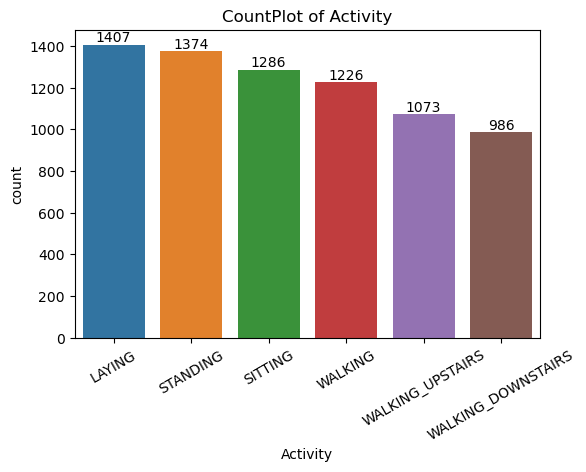

In [16]:
plt.figure(figsize=(6,4))
plt.title("CountPlot of Activity")
sns.countplot(data=train, x = 'Activity', order=train['Activity'].value_counts().index)
plt.xticks(rotation = 30)
ax = plt.gca()
add_bar_labels(ax)


#### CONCLUSION:- 
     There is almost same number of observations in each activity so this is not imbalance dataset

### 4 . Exploratory Data Analysis

In [17]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [18]:
Counter()

Counter()

In [19]:
i = 'tBodyAcc-arCoeff()-Y,4'

i.split('-')[0]

'tBodyAcc'

In [20]:
columns_counts = Counter([i.split('-')[0].split('(')[0] for i in train.columns])

In [21]:
pd.DataFrame.from_dict(columns_counts,orient = 'index').rename(columns ={0:'Count'}).sort_values("Count", ascending=False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well. Impressive how many features there are in regard of the limited number of sensors used.

Based on the common nature of activities we can broadly put them in two categories.
- Static and dynamic activities :- 
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAccMag-mean()** feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the **activity** using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

    4.a Analysing tBodyAccMag-mean feature

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                 STANDING


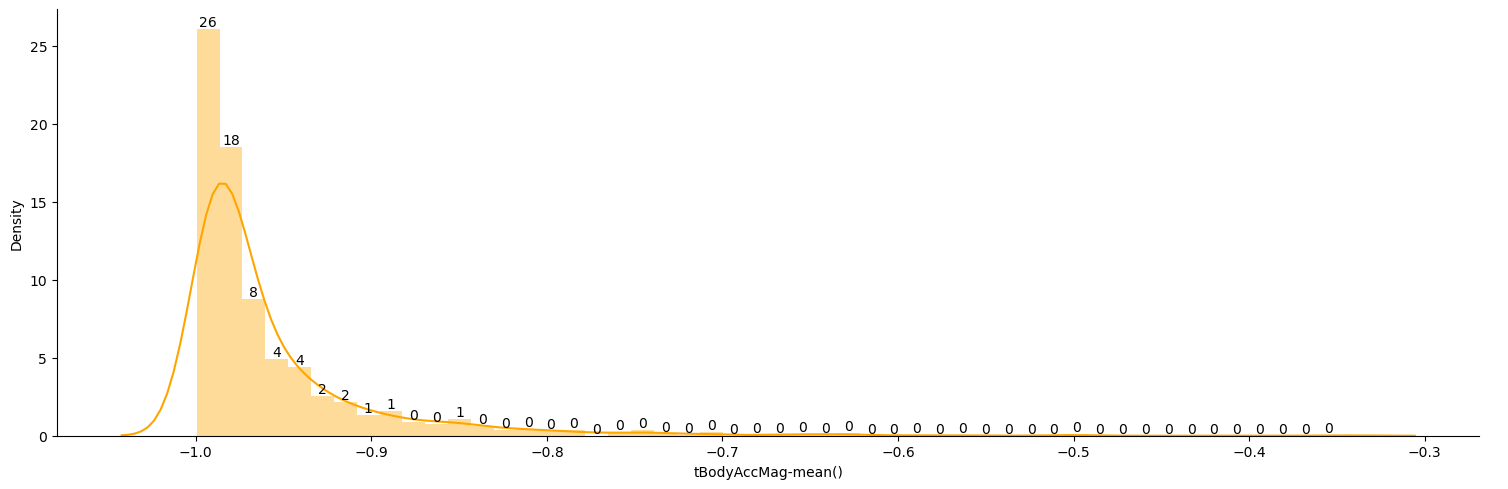

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                 SITTING


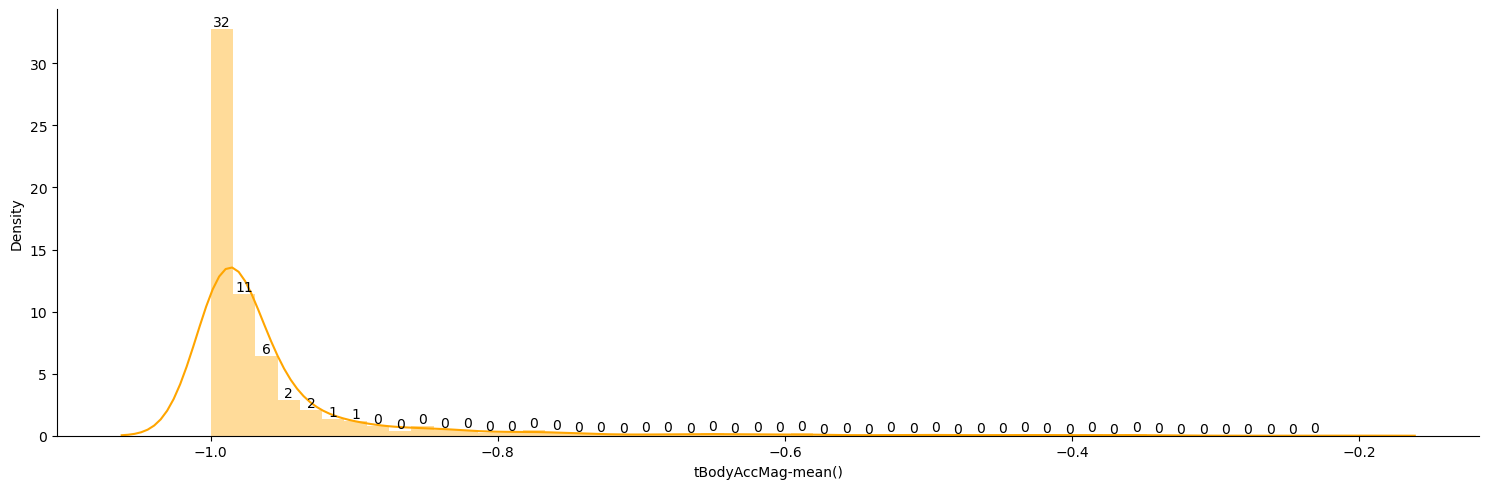

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                 LAYING


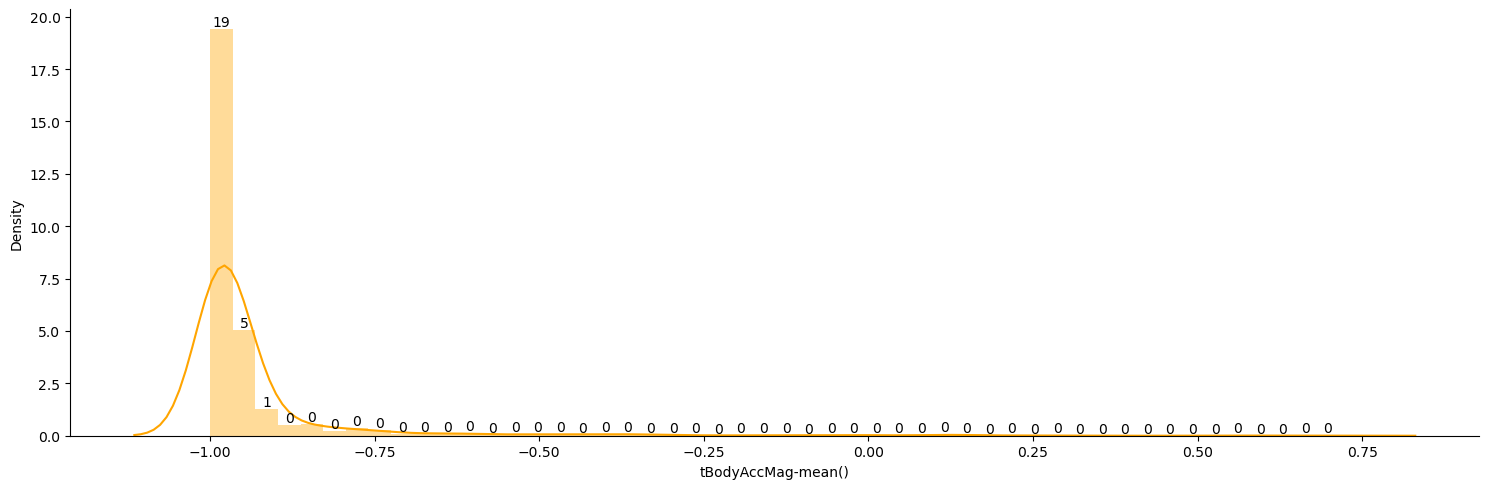

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                 WALKING


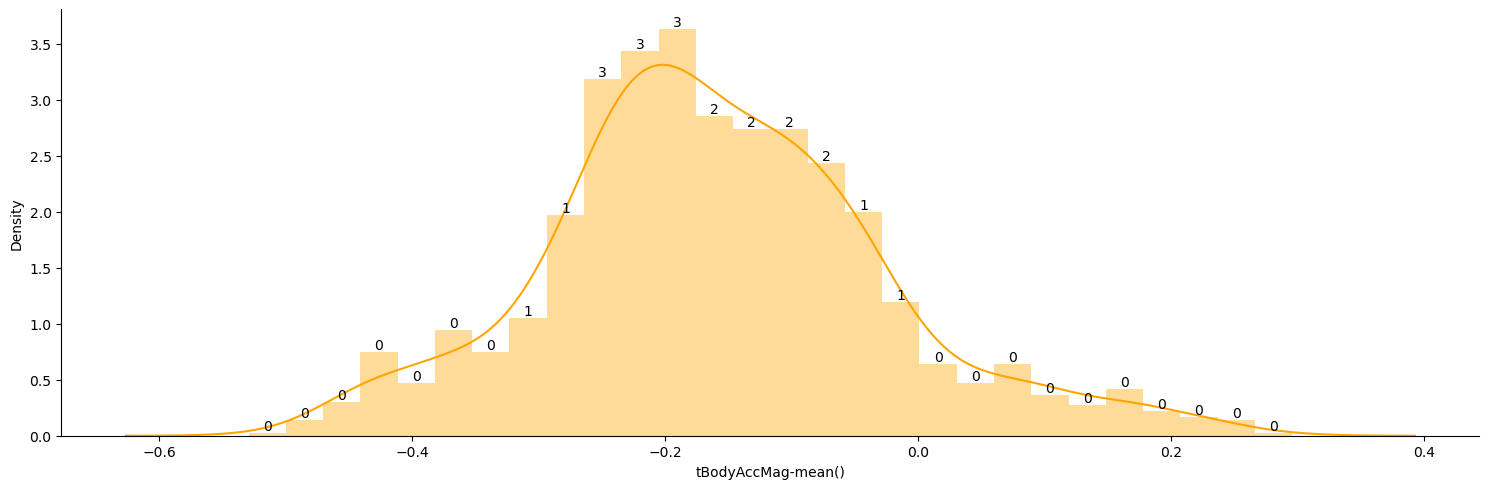

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                 WALKING_DOWNSTAIRS


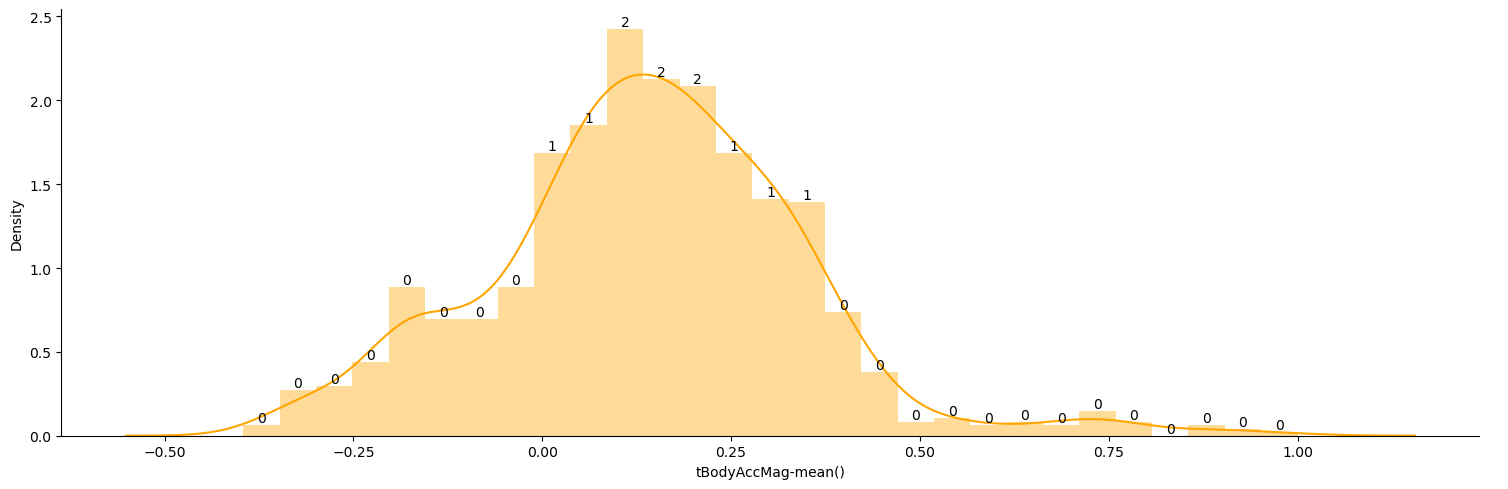

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                 WALKING_UPSTAIRS


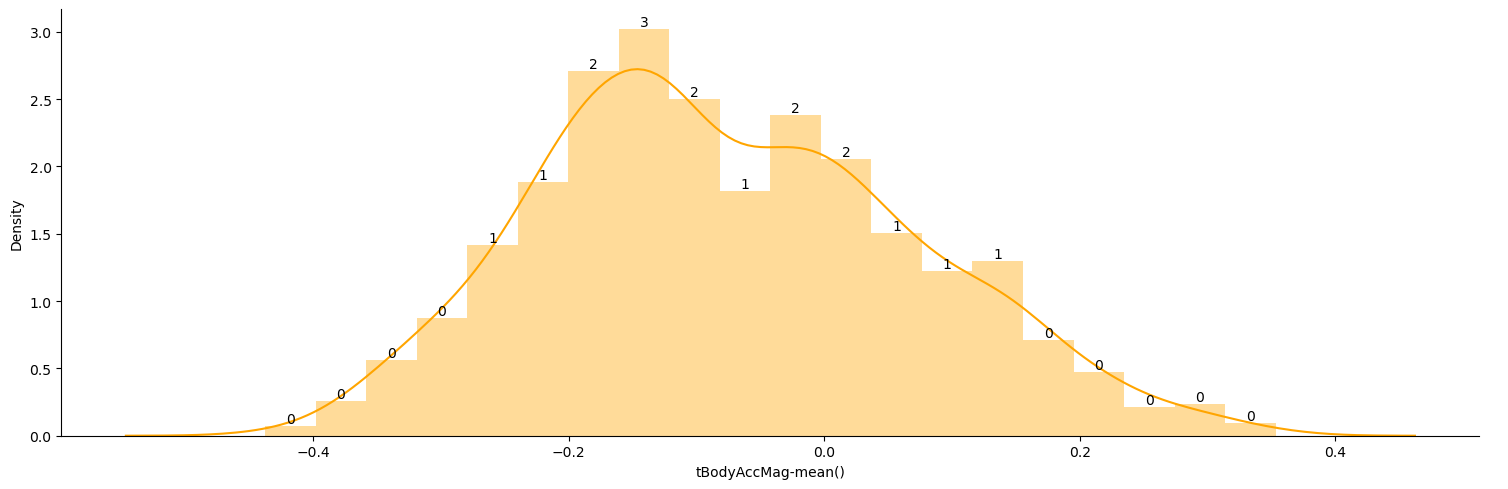

In [22]:
for i in train['Activity'].unique():
    df_temp = train[train['Activity']==i]
    
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print("                                                                                ",i) 
    facetgrid = sns.FacetGrid(df_temp,height = 5, aspect=3)
    facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = True,color = 'orange').add_legend()
    
    ax = plt.gca()
    add_bar_labels(ax)
    
    plt.show()
    

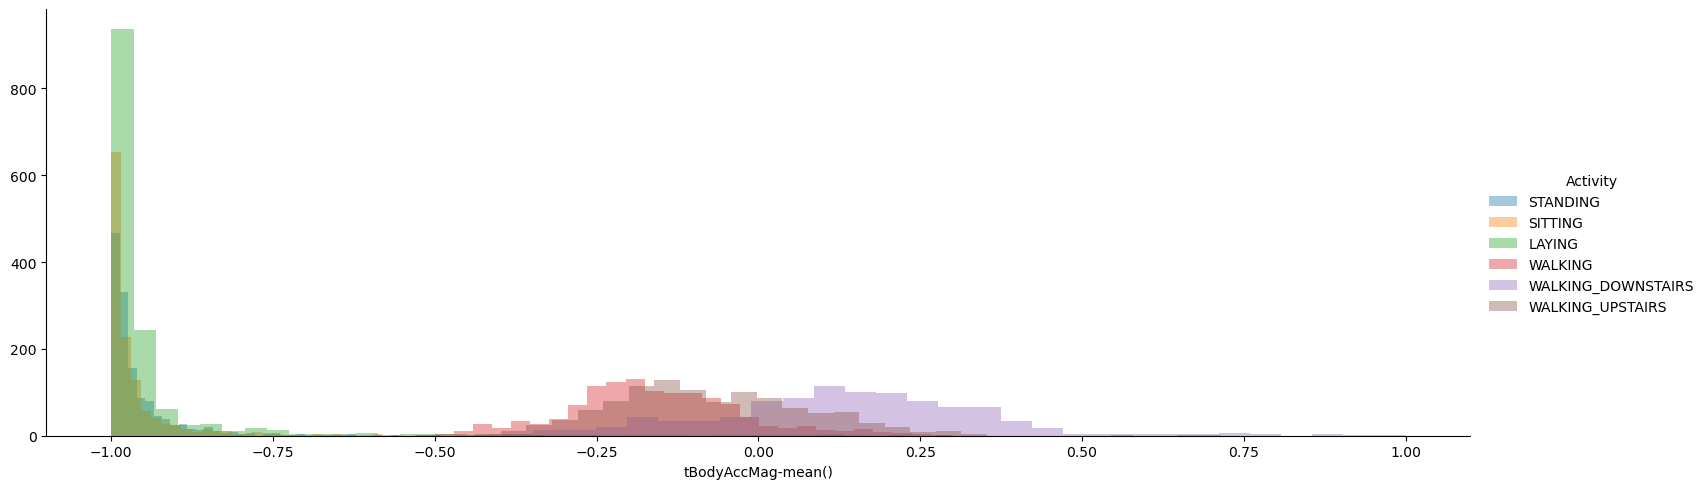

In [23]:
# tBodyAccMag-mean() is a parameter which is present at a index 200

facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = True, kde=False).add_legend()
    
plt.show()

Conclusion:-
    
    from this we get to know that is static activity the tBodyAccMag-mean() have no acceleration 
    while in dynamic activity the tBodyAccMag-mean() have accelearation which is range from -0.5 to 1

Text(0.2, 8, 'Dynamic Activity')

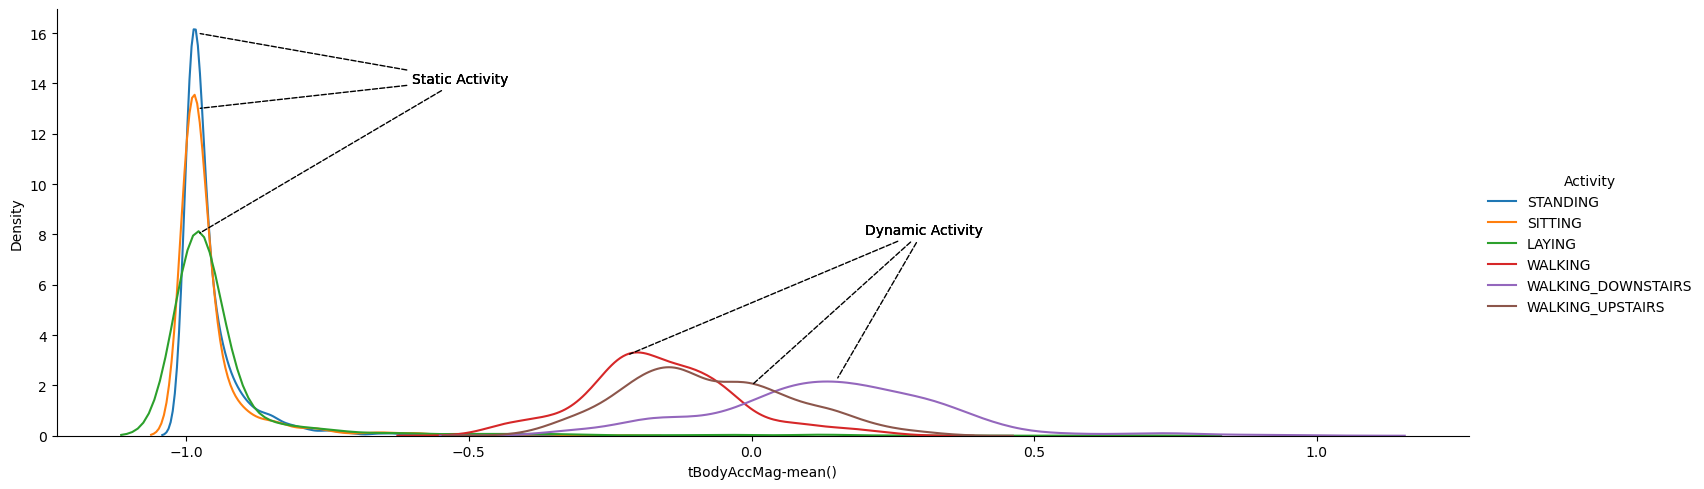

In [24]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()


plt.annotate("Static Activity", xy = (-.98,8), xytext=(-.6,14), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activity", xy = (-.98,13), xytext=(-.6,14), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activity", xy = (-.98,16), xytext=(-.6,14), arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate("Dynamic Activity", xy = (-.22,3.2), xytext=(.2,8),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activity", xy = (-.00,2.0), xytext=(.2,8),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activity", xy = (.15,2.2), xytext=(.2,8),arrowprops={'arrowstyle':'-','ls':'dashed'})

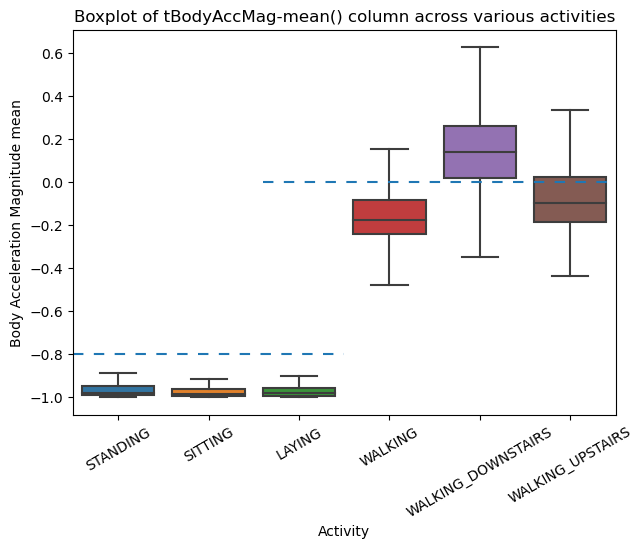

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(x = 'Activity', y = 'tBodyAccMag-mean()', data=train,showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.xticks(rotation = 30)
plt.axhline(y = -0.8, xmax = 0.5,dashes = (5,5))
plt.axhline(y = 0.0, xmin = 0.35, dashes = (5,5))


plt.show()

In [45]:
# ANALYSING ANGLE BETWEEN X-AXIS and gravity mean feature

In [46]:
train['angle(X,gravityMean)'].

array([-0.84124676, -0.8447876 , -0.84893347, ..., -0.77913261,
       -0.78518142, -0.78326693])

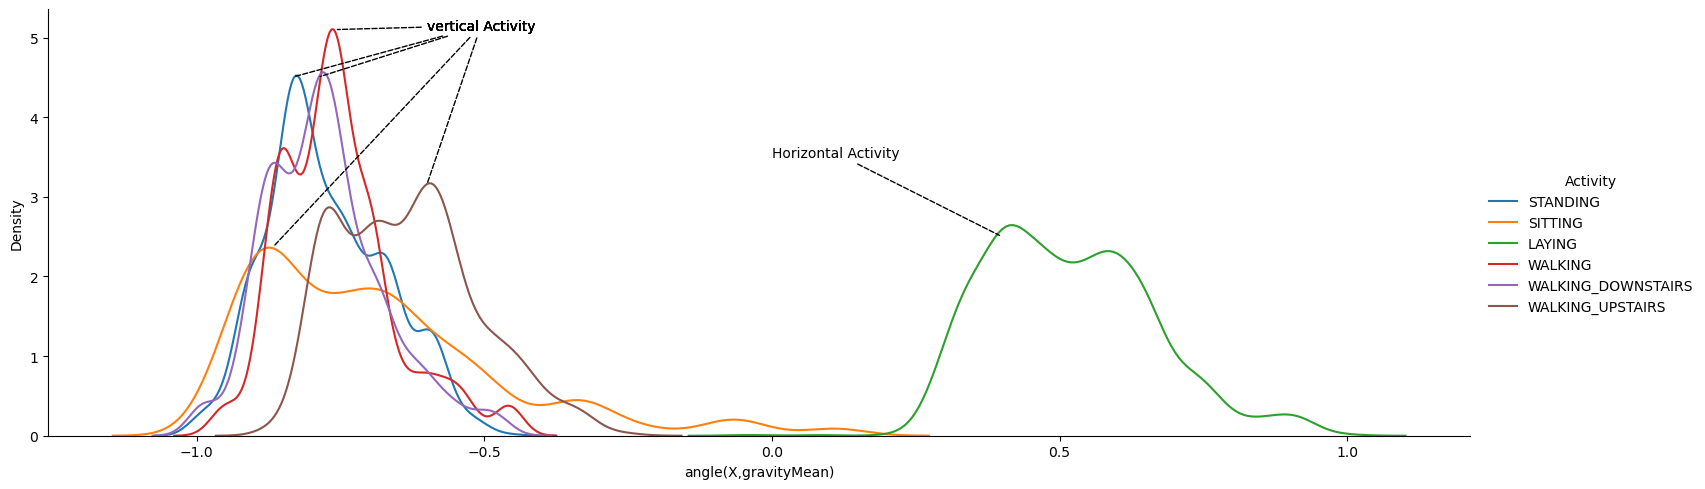

In [94]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'angle(X,gravityMean)', hist = False, kde=True).add_legend()
plt.annotate("vertical Activity", xy = (-.76,5.1), xytext=(-.6,5.1), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("vertical Activity", xy = (-.835,4.5), xytext=(-.6,5.1), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("vertical Activity", xy = (-.79,4.5), xytext=(-.6,5.1), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("vertical Activity", xy = (-.6,3.15), xytext=(-.6,5.1), arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("vertical Activity", xy = (-.87,2.35), xytext=(-.6,5.1), arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate("Horizontal Activity", xy = (.4, 2.5), xytext=(.0, 3.5), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
#plt.annotate("Horizontal Activity", xy = (.4,2.), xytext=(-.6,5.1), arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.show()

# facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
# facetgrid.map(sns.distplot, 'angle(X,gravityMean)', hist = True, kde=False).add_legend()
# plt.show()

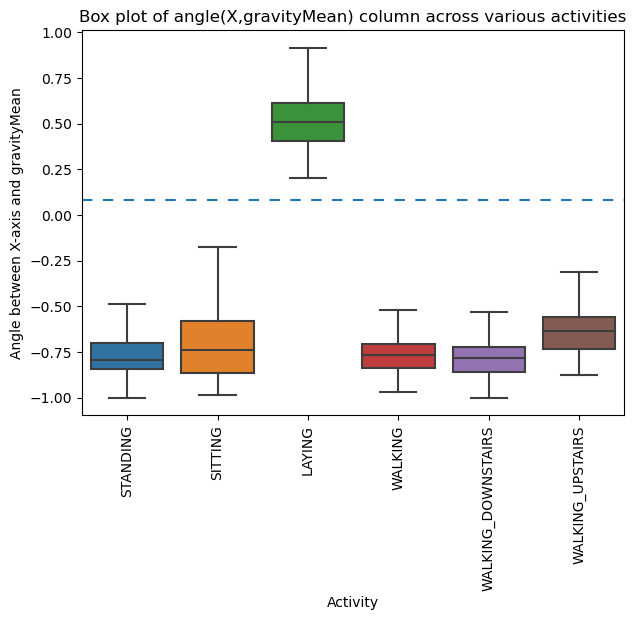

In [99]:
# With respect to X axis
plt.figure(figsize=(7,5))
sns.boxplot(data=train, y = 'angle(X,gravityMean)', x = 'Activity', showfliers = False)
plt.xticks(rotation=90)
plt.axhline(y = 0.08, xmax = 1, dashes = (5,5))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.show()


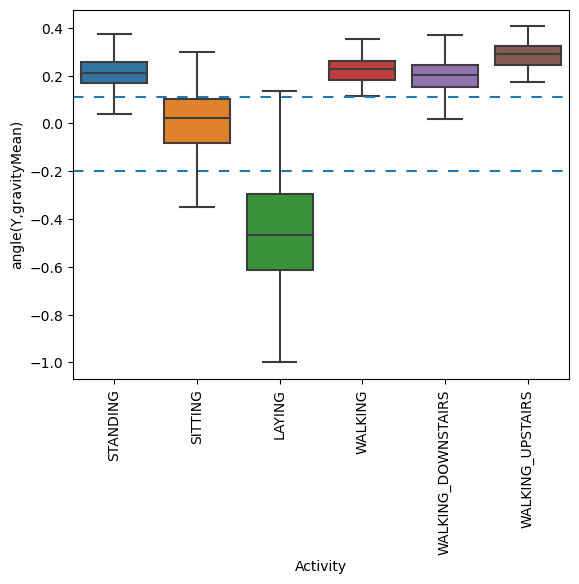

In [62]:
# With respect to Y axis
sns.boxplot(data=train, y = 'angle(Y,gravityMean)', x = 'Activity', showfliers = False)
plt.xticks(rotation=90)
plt.axhline(y = 0.11, xmax = 1, dashes = (5,5))
plt.axhline(y= -.2, xmax = 1, dashes = (5,5))

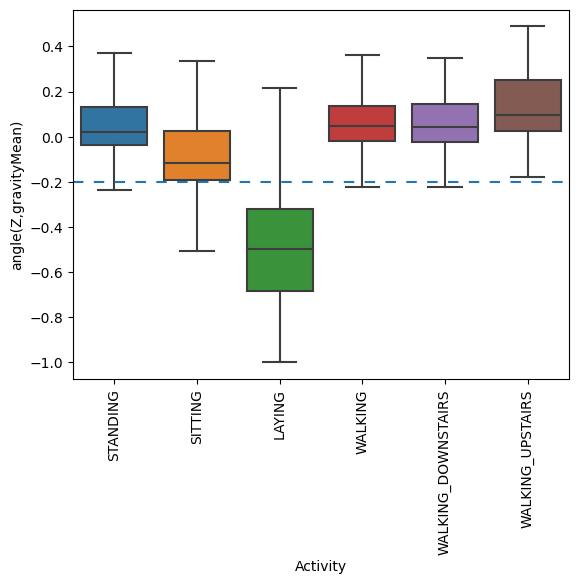

In [102]:
# With respect to Y axis
sns.boxplot(data=train, y = 'angle(Z,gravityMean)', x = 'Activity', showfliers = False)
plt.xticks(rotation=90)
# plt.axhline(y = 0.11, xmax = 1, dashes = (5,5))
plt.axhline(y= -.2, xmax = 1, dashes = (5,5))
plt.show()

In [106]:
x_for_PCA = train.drop(['subject','Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_PCA)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

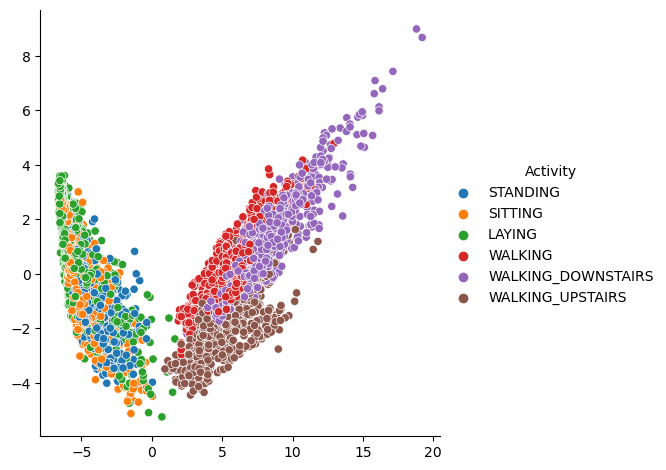

In [115]:
sns.relplot(x = pca[:,0], y = pca[:,1], hue = train['Activity'])
plt.show()

In [116]:
x_for_tsne = train.drop(['subject', 'Activity'],axis=1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

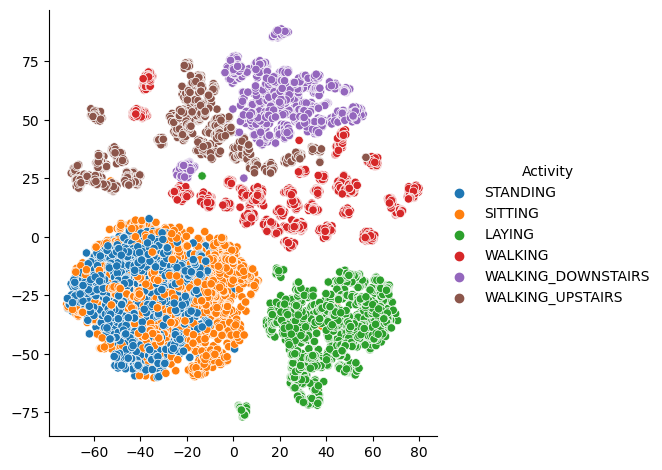

In [119]:
sns.relplot(y = tsne[:,0], x = tsne[:,1], hue = train['Activity'])
plt.show()

In [123]:
# SPLITTING TRAIN AND TEST DATA

X_TRAIN = train.drop(['Activity', 'subject'], axis=1)
Y_TRAIN = train['Activity']

X_TEST = test.drop(['Activity', 'subject'], axis=1)
Y_TEST = test['Activity']

In [124]:
print("Input train shape   :-",X_TRAIN.shape)
print("Output train shape :-",Y_TRAIN.shape)
print("Input test shape     :-",X_TEST.shape)
print("Output test shape   :-",Y_TEST.shape)

Input train shape   :- (7352, 561)
Output train shape :- (7352,)
Input test shape     :- (999, 561)
Output test shape   :- (999,)


In [126]:
parameters = {'max_iter':[100,200,500]}
LR_classifier = LogisticRegression()
LR_classifier_RS = RandomizedSearchCV(LR_classifier, param_distributions = parameters, cv = 5, random_state=42)
LR_classifier_RS.fit(X_TRAIN, Y_TRAIN)

Y_Pred_LR = LR_classifier_RS.predict(X_TEST)

In [128]:
LR_accuracy = accuracy_score(y_true=Y_TEST, y_pred=Y_Pred_LR)
print("Accuracy using Logistic Regression :- ",LR_accuracy)

Accuracy using Logistic Regression :-  0.954954954954955


In [134]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(7,7)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [132]:
cm = confusion_matrix(Y_TEST.values, Y_Pred_LR)
print(cm)

[[183   0   0   0   0   0]
 [  0 147  20   0   0   3]
 [  0   8 169   1   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0 134   0]
 [  0   0   0  13   0 136]]


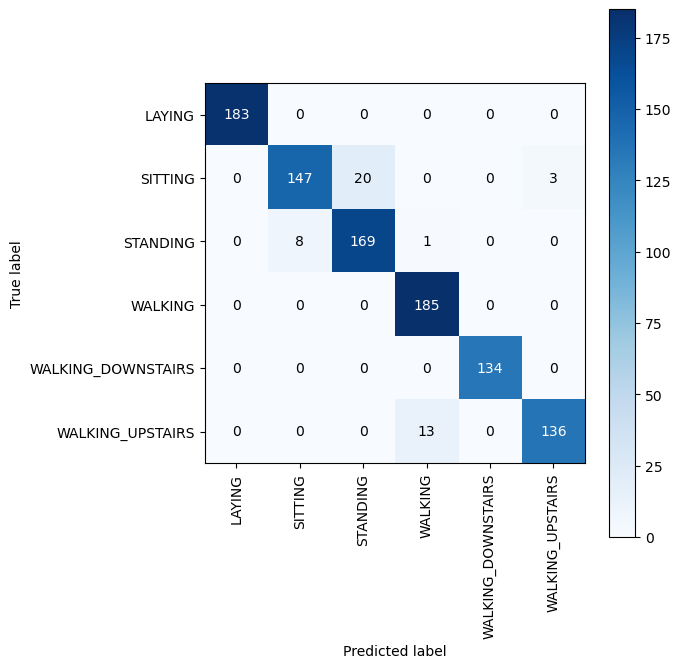

In [135]:
plot_confusion_matrix(cm, np.unique(Y_Pred_LR))

In [136]:
# function to get best random search attributes

def get_best_randomSearch_result(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of Parameter", model.best_params_)

In [137]:
get_best_randomSearch_result(LR_classifier_RS)

Best estimator :  LogisticRegression(max_iter=500)
Best set of Parameter {'max_iter': 500}


In [139]:
parameters = {'kernel':['linear', 'rbf','poly','sigmoid'], 'C':[100,50]}

LR_SVM = SVC()
LR_SVM_RS = RandomizedSearchCV(LR_SVM, param_distributions=parameters, cv = 5, random_state=42)
LR_SVM_RS.fit(X_TRAIN, Y_TRAIN)

Y_PRED_SVM = LR_SVM_RS.predict(X_TEST)

In [141]:
kernel_SVM_Accuracy = accuracy_score(y_true=Y_TEST, y_pred=Y_PRED_SVM)
kernel_SVM_Accuracy

0.9679679679679679

In [142]:
cm2 = confusion_matrix(Y_TEST.values, Y_PRED_SVM)
print(cm2)

[[183   0   0   0   0   0]
 [  0 149  19   0   0   2]
 [  0   5 173   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0 134   0]
 [  0   0   0   6   0 143]]


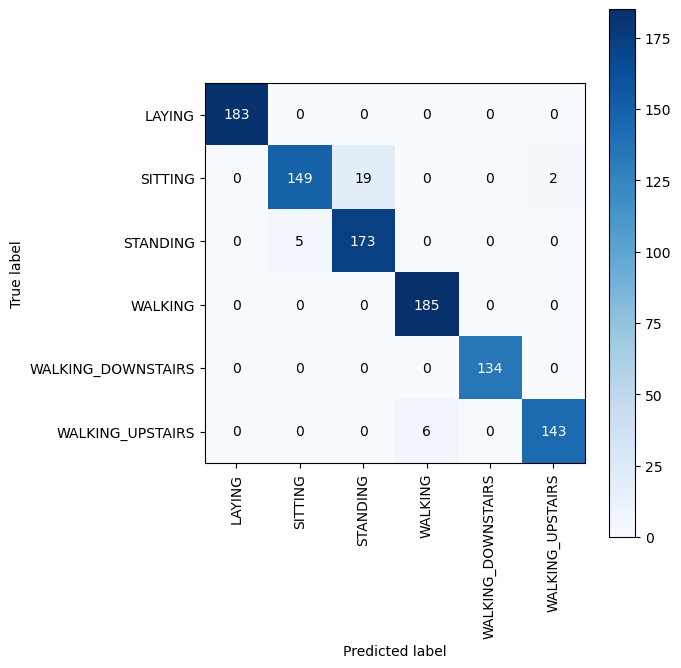

In [143]:
plot_confusion_matrix(cm2,np.unique(Y_PRED_SVM) )

In [144]:
get_best_randomSearch_result(LR_SVM_RS)

Best estimator :  SVC(C=100)
Best set of Parameter {'kernel': 'rbf', 'C': 100}


In [150]:
parameter = {'max_depth': np.arange(2,11, 2)}

DT_classifier = DecisionTreeClassifier()
DT_classifier_RS = RandomizedSearchCV(DT_classifier, param_distributions=parameter, random_state=42)
DT_classifier_RS.fit(X_TRAIN, Y_TRAIN)
DT_pred = DT_classifier_RS.predict(X_TEST)

In [151]:
DT_Accuracy = accuracy_score(y_true=Y_TEST, y_pred=DT_pred)
DT_Accuracy

0.8448448448448449

In [152]:
cm3 = confusion_matrix(Y_TEST.values, DT_pred)
print(cm3)

[[183   0   0   0   0   0]
 [  0 113  57   0   0   0]
 [  0  37 141   0   0   0]
 [  0   0   0 181   4   0]
 [  0   0   0  12 120   2]
 [  0   0   0  33  10 106]]


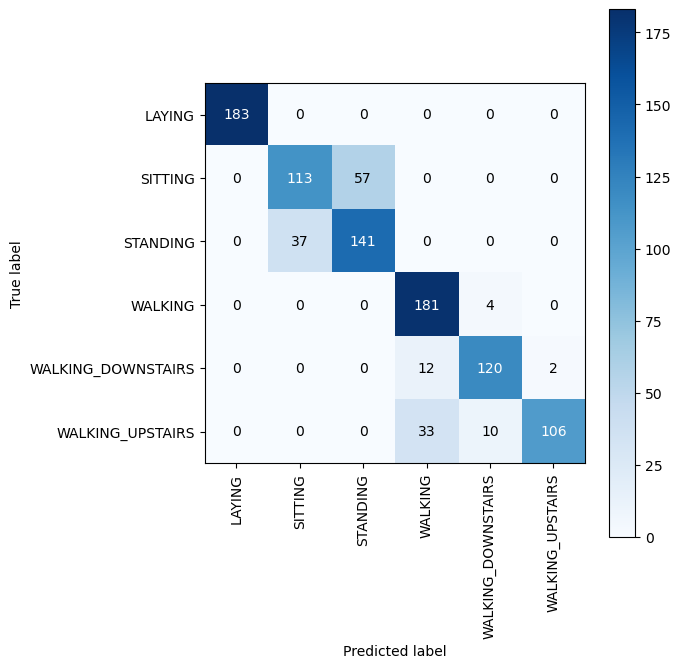

In [153]:
plot_confusion_matrix(cm3, np.unique(DT_pred))

In [154]:
get_best_randomSearch_result(DT_classifier_RS)

Best estimator :  DecisionTreeClassifier(max_depth=10)
Best set of Parameter {'max_depth': 10}


In [156]:
parameter = { 'n_estimators' : np.arange(20, 101, 10), 'max_depth':np.arange(2, 17, 2)}

RF_classifier = RandomForestClassifier()
RF_classifier_RS = RandomizedSearchCV(RF_classifier, param_distributions=parameter, cv = 5, random_state=42)
RF_classifier_RS.fit(X_TRAIN, Y_TRAIN)
RF_Pred = RF_classifier_RS.predict(X_TEST)

In [160]:
RF_Accuracy = accuracy_score(y_true=Y_TEST, y_pred=RF_Pred)
RF_Accuracy

0.9019019019019019

In [158]:
cm4 = confusion_matrix(y_true=Y_TEST, y_pred=RF_Pred)
cm4

array([[183,   0,   0,   0,   0,   0],
       [  0, 135,  35,   0,   0,   0],
       [  0,  32, 146,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   9, 125,   0],
       [  0,   0,   0,  22,   0, 127]], dtype=int64)

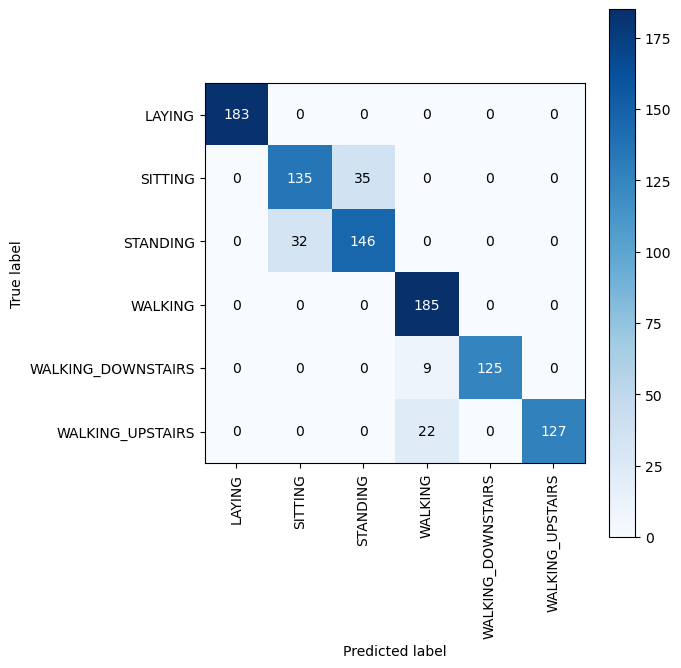

In [161]:
plot_confusion_matrix(cm4, np.unique(RF_Pred))

In [162]:
get_best_randomSearch_result(RF_classifier_RS)

Best estimator :  RandomForestClassifier(max_depth=8, n_estimators=90)
Best set of Parameter {'n_estimators': 90, 'max_depth': 8}
